# Is Skforecast slow?

## Libraries

In [13]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster

## Data

In [17]:
# Create random data points
# ==============================================================================
np.random.seed(123)
y = pd.Series(np.random.rand(10000), name='y')
exog = pd.Series(np.random.rand(10000), name='exog')

## ForecasterAutoreg

In [32]:
# Create forecaster and train loop
# ==============================================================================
lags = [1, 10, 100, 1000, 5000]
lags = [1, 10, 25, 50, 100]

time_forecaster = {lag: [] for lag in lags}

for lag in lags:

    forecaster = ForecasterAutoreg(
                    regressor = LinearRegression(),
                    lags      = lag
                )
    
    experiment_times = []
    for i in list(range(10)):

        start_time = time.time()
        forecaster.fit(y=y)
        end_time = time.time()
        
        elapsed_time = end_time - start_time

        experiment_times.append(elapsed_time)

    time_forecaster[lag].extend(experiment_times)


In [34]:
pd.DataFrame(time_forecaster)

,1,10,25,50,100
0,0.046472,0.040035,0.047840,0.072797,0.083524
1,0.037818,0.039731,0.048836,0.059353,0.085455
2,0.036876,0.040819,0.049310,0.059800,0.083520
3,0.036873,0.040260,0.050830,0.058798,0.085209
4,0.035884,0.040868,0.049833,0.058808,0.085315
5,0.035879,0.040443,0.048836,0.058845,0.084591
6,0.035880,0.040870,0.048833,0.059795,0.086746
7,0.036877,0.040863,0.048991,0.062790,0.084026
8,0.037027,0.043849,0.048837,0.066548,0.084857
9,0.034887,0.042857,0.047836,0.059159,0.082373


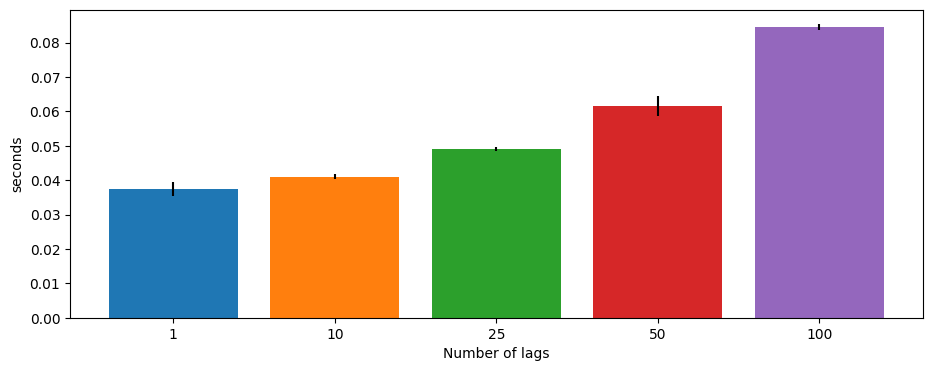

In [41]:
# ==============================================================================
df_times = pd.DataFrame(time_forecaster)

fig, ax = plt.subplots(figsize=(11, 4))

for i, lag in enumerate(df_times.columns):

    plt.bar(i, df_times[lag].mean(),
            yerr=1.96*df_times[lag].std()/len(df_times[lag])**0.5)

plt.xticks(list(range(len(df_times.columns))), df_times.columns)
plt.xlabel('Number of lags')
plt.ylabel('seconds');

In [ ]:
# Dividir esto en create_train_X_y() + forecaster.regressor.fit()

In [15]:
%%html
<style>
.jupyter-wrapper .jp-CodeCell .jp-Cell-inputWrapper .jp-InputPrompt {display: none;}
</style>